## Hourly Rental

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from geopy import distance

In [2]:
df = pd.read_csv('df_travel_type_3.csv')

In [3]:
df

,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,2.0,3,448.0,NaN,NaN,NaN,01-01-2013 16:00,0,0,01-01-2013 09:44,12.927320,77.635750,NaN,NaN,0
1,2.0,3,471.0,NaN,NaN,NaN,01-01-2013 14:30,0,0,01-01-2013 12:52,13.018540,77.635240,NaN,NaN,0
2,1.0,3,1286.0,NaN,NaN,NaN,01-01-2013 16:30,0,0,01-01-2013 14:39,12.973448,77.620320,NaN,NaN,0
3,1.0,3,1323.0,NaN,NaN,NaN,01-01-2013 20:00,1,0,01-01-2013 17:25,12.869805,77.653211,NaN,NaN,0
4,2.0,3,142.0,NaN,NaN,NaN,01-02-2013 03:00,0,0,01-01-2013 19:37,12.912810,77.609230,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7545,1.0,3,768.0,NaN,15.0,NaN,11/24/2013 16:00,0,1,11/24/2013 12:32,12.989990,77.553320,NaN,NaN,0
7546,4.0,3,1390.0,NaN,15.0,NaN,11/24/2013 15:00,0,0,11/24/2013 13:06,12.969368,77.641302,NaN,NaN,0
7547,2.0,3,1237.0,NaN,15.0,NaN,11/25/2013 1:00,1,0,11/24/2013 13:54,12.926450,77.612060,NaN,NaN,0
7548,2.0,3,515.0,NaN,15.0,NaN,11/24/2013 15:15,0,0,11/24/2013 14:23,12.978960,77.673450,NaN,NaN,0


In [4]:
df.isna().sum()

package_id                0
travel_type_id            0
from_area_id              0
to_area_id             7550
from_city_id           7102
to_city_id             7550
from_date                 0
online_booking            0
mobile_site_booking       0
booking_created           0
from_lat                  0
from_long                 0
to_lat                 7550
to_long                7550
Car_Cancellation          0
dtype: int64

## Data Cleaning

### to_area_id, from_city_id,to_city_id,to_lat,to_long are all empty columns, so we can drop them

In [5]:
df=df.drop(['to_area_id','from_city_id','to_city_id','to_lat','to_long'],axis=1)
df.head()

,package_id,travel_type_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,Car_Cancellation
0,2.0,3,448.0,01-01-2013 16:00,0,0,01-01-2013 09:44,12.927320,77.635750,0
1,2.0,3,471.0,01-01-2013 14:30,0,0,01-01-2013 12:52,13.018540,77.635240,0
2,1.0,3,1286.0,01-01-2013 16:30,0,0,01-01-2013 14:39,12.973448,77.620320,0
3,1.0,3,1323.0,01-01-2013 20:00,1,0,01-01-2013 17:25,12.869805,77.653211,0
4,2.0,3,142.0,01-02-2013 03:00,0,0,01-01-2013 19:37,12.912810,77.609230,0


### travel_type_id  is all same so we do not need it

In [6]:
df=df.drop(['travel_type_id'],axis=1)
df.head()

,package_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,Car_Cancellation
0,2.0,448.0,01-01-2013 16:00,0,0,01-01-2013 09:44,12.927320,77.635750,0
1,2.0,471.0,01-01-2013 14:30,0,0,01-01-2013 12:52,13.018540,77.635240,0
2,1.0,1286.0,01-01-2013 16:30,0,0,01-01-2013 14:39,12.973448,77.620320,0
3,1.0,1323.0,01-01-2013 20:00,1,0,01-01-2013 17:25,12.869805,77.653211,0
4,2.0,142.0,01-02-2013 03:00,0,0,01-01-2013 19:37,12.912810,77.609230,0


In [7]:
df.shape

(7550, 9)

In [8]:
df.isna().sum()

package_id             0
from_area_id           0
from_date              0
online_booking         0
mobile_site_booking    0
booking_created        0
from_lat               0
from_long              0
Car_Cancellation       0
dtype: int64

# Data Transformation

In [9]:
df['from_date'] = pd.to_datetime(df['from_date'],format='mixed')
df['booking_created'] = pd.to_datetime(df['booking_created'],format='mixed')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7550 entries, 0 to 7549
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   package_id           7550 non-null   float64       
 1   from_area_id         7550 non-null   float64       
 2   from_date            7550 non-null   datetime64[ns]
 3   online_booking       7550 non-null   int64         
 4   mobile_site_booking  7550 non-null   int64         
 5   booking_created      7550 non-null   datetime64[ns]
 6   from_lat             7550 non-null   float64       
 7   from_long            7550 non-null   float64       
 8   Car_Cancellation     7550 non-null   int64         
dtypes: datetime64[ns](2), float64(4), int64(3)
memory usage: 531.0 KB


In [10]:
df['is_weekend'] = df['from_date'].dt.dayofweek.apply(lambda x: 1 if x >= 5 else 0)
df['booking_gap'] = (df['from_date'] - df['booking_created']).dt.days

df.head()

,package_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,Car_Cancellation,is_weekend,booking_gap
0,2.0,448.0,2013-01-01 16:00:00,0,0,2013-01-01 09:44:00,12.927320,77.635750,0,0,0
1,2.0,471.0,2013-01-01 14:30:00,0,0,2013-01-01 12:52:00,13.018540,77.635240,0,0,0
2,1.0,1286.0,2013-01-01 16:30:00,0,0,2013-01-01 14:39:00,12.973448,77.620320,0,0,0
3,1.0,1323.0,2013-01-01 20:00:00,1,0,2013-01-01 17:25:00,12.869805,77.653211,0,0,0
4,2.0,142.0,2013-01-02 03:00:00,0,0,2013-01-01 19:37:00,12.912810,77.609230,0,0,0


In [11]:
df['trip_day'] = df['from_date'].dt.day_name()
df['booking_created_day'] = df['booking_created'].dt.day_name()
df.head()

,package_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,Car_Cancellation,is_weekend,booking_gap,trip_day,booking_created_day
0,2.0,448.0,2013-01-01 16:00:00,0,0,2013-01-01 09:44:00,12.927320,77.635750,0,0,0,Tuesday,Tuesday
1,2.0,471.0,2013-01-01 14:30:00,0,0,2013-01-01 12:52:00,13.018540,77.635240,0,0,0,Tuesday,Tuesday
2,1.0,1286.0,2013-01-01 16:30:00,0,0,2013-01-01 14:39:00,12.973448,77.620320,0,0,0,Tuesday,Tuesday
3,1.0,1323.0,2013-01-01 20:00:00,1,0,2013-01-01 17:25:00,12.869805,77.653211,0,0,0,Tuesday,Tuesday
4,2.0,142.0,2013-01-02 03:00:00,0,0,2013-01-01 19:37:00,12.912810,77.609230,0,0,0,Wednesday,Tuesday


In [12]:
df['trip_month'] = df['from_date'].dt.month_name()
df['booking_created_month'] = df['booking_created'].dt.month_name()
df

,package_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,Car_Cancellation,is_weekend,booking_gap,trip_day,booking_created_day,trip_month,booking_created_month
0,2.0,448.0,2013-01-01 16:00:00,0,0,2013-01-01 09:44:00,12.927320,77.635750,0,0,0,Tuesday,Tuesday,January,January
1,2.0,471.0,2013-01-01 14:30:00,0,0,2013-01-01 12:52:00,13.018540,77.635240,0,0,0,Tuesday,Tuesday,January,January
2,1.0,1286.0,2013-01-01 16:30:00,0,0,2013-01-01 14:39:00,12.973448,77.620320,0,0,0,Tuesday,Tuesday,January,January
3,1.0,1323.0,2013-01-01 20:00:00,1,0,2013-01-01 17:25:00,12.869805,77.653211,0,0,0,Tuesday,Tuesday,January,January
4,2.0,142.0,2013-01-02 03:00:00,0,0,2013-01-01 19:37:00,12.912810,77.609230,0,0,0,Wednesday,Tuesday,January,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7545,1.0,768.0,2013-11-24 16:00:00,0,1,2013-11-24 12:32:00,12.989990,77.553320,0,1,0,Sunday,Sunday,November,November
7546,4.0,1390.0,2013-11-24 15:00:00,0,0,2013-11-24 13:06:00,12.969368,77.641302,0,1,0,Sunday,Sunday,November,November
7547,2.0,1237.0,2013-11-25 01:00:00,1,0,2013-11-24 13:54:00,12.926450,77.612060,0,0,0,Monday,Sunday,November,November
7548,2.0,515.0,2013-11-24 15:15:00,0,0,2013-11-24 14:23:00,12.978960,77.673450,0,1,0,Sunday,Sunday,November,November


In [13]:
# Step 1: Group by from_area_id and sum Car_Cancellation
cancellations_by_area = df.groupby('from_area_id')['Car_Cancellation'].sum().reset_index()

# Step 2: Define the thresholds for the categories
# Zero Cancellation: 0 cancellations
# Low Cancellation: 1st quartile (up to 25th percentile)
# Medium Cancellation: 2nd and 3rd quartiles (25th to 75th percentile)
# Higher Cancellation: 4th quartile (above 75th percentile)

# Step 3: Calculate the thresholds for the quartiles
low_threshold = cancellations_by_area['Car_Cancellation'].quantile(0.25)
medium_threshold = cancellations_by_area['Car_Cancellation'].quantile(0.75)

# Step 4: Create a function to categorize each from_area_id
def categorize_cancellation(row):
    if row['Car_Cancellation'] == 0:
        return 'Zero Cancellation'
    elif row['Car_Cancellation'] <= low_threshold:
        return 'Low Cancellation'
    elif row['Car_Cancellation'] <= medium_threshold:
        return 'Medium Cancellation'
    else:
        return 'Higher Cancellation'

# Step 5: Apply the function to create a new column 'Cancellation_Category'

cancellations_by_area['Cancellation_Category'] = cancellations_by_area.apply(categorize_cancellation, axis=1)

# Step 6: View the result

cancellations_by_area[['from_area_id', 'Car_Cancellation', 'Cancellation_Category']]


,from_area_id,Car_Cancellation,Cancellation_Category
0,2.0,0,Zero Cancellation
1,6.0,0,Zero Cancellation
2,16.0,0,Zero Cancellation
3,17.0,0,Zero Cancellation
4,22.0,3,Higher Cancellation
...,...,...,...
477,1394.0,0,Zero Cancellation
478,1395.0,1,Medium Cancellation
479,1398.0,0,Zero Cancellation
480,1399.0,0,Zero Cancellation


### We are dividing the from_area_id into four categories, Zero,Low,Medium,High

In [14]:
# Create a function to categorize each from_area_id

def categorize_cancellation(row):
    if row['Car_Cancellation'] == 0:
        return 'Zero Cancellation'
    elif row['Car_Cancellation'] <= low_threshold:
        return 'Low Cancellation'
    elif row['Car_Cancellation'] <= medium_threshold:
        return 'Medium Cancellation'
    else:
        return 'Higher Cancellation'

# Apply the function to create a new column 'Cancellation_Category' in cancellations_by_area

cancellations_by_area['from_area_Category'] = cancellations_by_area.apply(categorize_cancellation, axis=1)

# Merge the cancellation categories back to the original df
df = df.merge(cancellations_by_area[['from_area_id', 'from_area_Category']], on='from_area_id', how='left')

#View the updated DataFrame
df.head(6)


,package_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,Car_Cancellation,is_weekend,booking_gap,trip_day,booking_created_day,trip_month,booking_created_month,from_area_Category
0,2.0,448.0,2013-01-01 16:00:00,0,0,2013-01-01 09:44:00,12.927320,77.635750,0,0,0,Tuesday,Tuesday,January,January,Higher Cancellation
1,2.0,471.0,2013-01-01 14:30:00,0,0,2013-01-01 12:52:00,13.018540,77.635240,0,0,0,Tuesday,Tuesday,January,January,Higher Cancellation
2,1.0,1286.0,2013-01-01 16:30:00,0,0,2013-01-01 14:39:00,12.973448,77.620320,0,0,0,Tuesday,Tuesday,January,January,Medium Cancellation
3,1.0,1323.0,2013-01-01 20:00:00,1,0,2013-01-01 17:25:00,12.869805,77.653211,0,0,0,Tuesday,Tuesday,January,January,Higher Cancellation
4,2.0,142.0,2013-01-02 03:00:00,0,0,2013-01-01 19:37:00,12.912810,77.609230,0,0,0,Wednesday,Tuesday,January,January,Higher Cancellation
5,2.0,87.0,2013-01-02 12:00:00,0,0,2013-01-02 08:35:00,12.970030,77.606580,0,0,0,Wednesday,Wednesday,January,January,Zero Cancellation


In [15]:
# from_lat and from_long is  not useful

df=df.drop(['from_lat','from_long'],axis=1)

### Now we need to create two columns for the part of day the trip is and booking is done

In [16]:
hour = df['from_date'].dt.hour

# Define conditions for time of day
cond = [
    hour.between(5, 8),   # Early Morning
    hour.between(9, 12),  # Morning
    hour.between(13, 16), # Afternoon
    hour.between(17, 20), # Evening
    (hour.between(21, 23)) | (hour == 0), # Night
    hour.between(1, 4)    # Late Night
]

# Define values corresponding to each condition
values = ['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late Night']

# Create new column based on conditions
df['trip_time_of_day'] = np.select(cond, values, default='Unknown')

# Display the DataFrame with the new column
df.head()

,package_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_weekend,booking_gap,trip_day,booking_created_day,trip_month,booking_created_month,from_area_Category,trip_time_of_day
0,2.0,448.0,2013-01-01 16:00:00,0,0,2013-01-01 09:44:00,0,0,0,Tuesday,Tuesday,January,January,Higher Cancellation,Afternoon
1,2.0,471.0,2013-01-01 14:30:00,0,0,2013-01-01 12:52:00,0,0,0,Tuesday,Tuesday,January,January,Higher Cancellation,Afternoon
2,1.0,1286.0,2013-01-01 16:30:00,0,0,2013-01-01 14:39:00,0,0,0,Tuesday,Tuesday,January,January,Medium Cancellation,Afternoon
3,1.0,1323.0,2013-01-01 20:00:00,1,0,2013-01-01 17:25:00,0,0,0,Tuesday,Tuesday,January,January,Higher Cancellation,Evening
4,2.0,142.0,2013-01-02 03:00:00,0,0,2013-01-01 19:37:00,0,0,0,Wednesday,Tuesday,January,January,Higher Cancellation,Late Night


In [17]:
hour = df['booking_created'].dt.hour

# Define conditions for time of day
cond = [
    hour.between(5, 8),   # Early Morning
    hour.between(9, 12),  # Morning
    hour.between(13, 16), # Afternoon
    hour.between(17, 20), # Evening
    (hour.between(21, 23)) | (hour == 0), # Night
    hour.between(1, 4)    # Late Night
]

# Define values corresponding to each condition
values = ['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late Night']

# Create new column based on conditions
df['booking_time_of_day'] = np.select(cond, values, default='Unknown')

# Display the DataFrame with the new column
df.head()

,package_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_weekend,booking_gap,trip_day,booking_created_day,trip_month,booking_created_month,from_area_Category,trip_time_of_day,booking_time_of_day
0,2.0,448.0,2013-01-01 16:00:00,0,0,2013-01-01 09:44:00,0,0,0,Tuesday,Tuesday,January,January,Higher Cancellation,Afternoon,Morning
1,2.0,471.0,2013-01-01 14:30:00,0,0,2013-01-01 12:52:00,0,0,0,Tuesday,Tuesday,January,January,Higher Cancellation,Afternoon,Morning
2,1.0,1286.0,2013-01-01 16:30:00,0,0,2013-01-01 14:39:00,0,0,0,Tuesday,Tuesday,January,January,Medium Cancellation,Afternoon,Afternoon
3,1.0,1323.0,2013-01-01 20:00:00,1,0,2013-01-01 17:25:00,0,0,0,Tuesday,Tuesday,January,January,Higher Cancellation,Evening,Evening
4,2.0,142.0,2013-01-02 03:00:00,0,0,2013-01-01 19:37:00,0,0,0,Wednesday,Tuesday,January,January,Higher Cancellation,Late Night,Evening


## We no longer need following  columns

#### from_area_id
#### from_date
#### booking_created


In [18]:
df=df.drop(['from_area_id','from_date','booking_created'],axis=1)

In [19]:
df.head()

,package_id,online_booking,mobile_site_booking,Car_Cancellation,is_weekend,booking_gap,trip_day,booking_created_day,trip_month,booking_created_month,from_area_Category,trip_time_of_day,booking_time_of_day
0,2.0,0,0,0,0,0,Tuesday,Tuesday,January,January,Higher Cancellation,Afternoon,Morning
1,2.0,0,0,0,0,0,Tuesday,Tuesday,January,January,Higher Cancellation,Afternoon,Morning
2,1.0,0,0,0,0,0,Tuesday,Tuesday,January,January,Medium Cancellation,Afternoon,Afternoon
3,1.0,1,0,0,0,0,Tuesday,Tuesday,January,January,Higher Cancellation,Evening,Evening
4,2.0,0,0,0,0,0,Wednesday,Tuesday,January,January,Higher Cancellation,Late Night,Evening


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7550 entries, 0 to 7549
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   package_id             7550 non-null   float64
 1   online_booking         7550 non-null   int64  
 2   mobile_site_booking    7550 non-null   int64  
 3   Car_Cancellation       7550 non-null   int64  
 4   is_weekend             7550 non-null   int64  
 5   booking_gap            7550 non-null   int64  
 6   trip_day               7550 non-null   object 
 7   booking_created_day    7550 non-null   object 
 8   trip_month             7550 non-null   object 
 9   booking_created_month  7550 non-null   object 
 10  from_area_Category     7550 non-null   object 
 11  trip_time_of_day       7550 non-null   object 
 12  booking_time_of_day    7550 non-null   object 
dtypes: float64(1), int64(5), object(7)
memory usage: 766.9+ KB


In [21]:
num_df = df.select_dtypes(include='number')
char_df = df.select_dtypes(include='object')

In [22]:
num_df.head()

,package_id,online_booking,mobile_site_booking,Car_Cancellation,is_weekend,booking_gap
0,2.0,0,0,0,0,0
1,2.0,0,0,0,0,0
2,1.0,0,0,0,0,0
3,1.0,1,0,0,0,0
4,2.0,0,0,0,0,0


In [23]:
char_df.head()

,trip_day,booking_created_day,trip_month,booking_created_month,from_area_Category,trip_time_of_day,booking_time_of_day
0,Tuesday,Tuesday,January,January,Higher Cancellation,Afternoon,Morning
1,Tuesday,Tuesday,January,January,Higher Cancellation,Afternoon,Morning
2,Tuesday,Tuesday,January,January,Medium Cancellation,Afternoon,Afternoon
3,Tuesday,Tuesday,January,January,Higher Cancellation,Evening,Evening
4,Wednesday,Tuesday,January,January,Higher Cancellation,Late Night,Evening


In [24]:
X_char_dum = pd.get_dummies(char_df, drop_first = True).astype('int')
X_char_dum.shape

(7550, 44)

In [25]:
pd.set_option('display.max_columns', None)
X_char_dum.head()

,trip_day_Monday,trip_day_Saturday,trip_day_Sunday,trip_day_Thursday,trip_day_Tuesday,trip_day_Wednesday,booking_created_day_Monday,booking_created_day_Saturday,booking_created_day_Sunday,booking_created_day_Thursday,booking_created_day_Tuesday,booking_created_day_Wednesday,trip_month_August,trip_month_February,trip_month_January,trip_month_July,trip_month_June,trip_month_March,trip_month_May,trip_month_November,trip_month_October,trip_month_September,booking_created_month_August,booking_created_month_February,booking_created_month_January,booking_created_month_July,booking_created_month_June,booking_created_month_March,booking_created_month_May,booking_created_month_November,booking_created_month_October,booking_created_month_September,from_area_Category_Medium Cancellation,from_area_Category_Zero Cancellation,trip_time_of_day_Early Morning,trip_time_of_day_Evening,trip_time_of_day_Late Night,trip_time_of_day_Morning,trip_time_of_day_Night,booking_time_of_day_Early Morning,booking_time_of_day_Evening,booking_time_of_day_Late Night,booking_time_of_day_Morning,booking_time_of_day_Night
0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [26]:
X = pd.concat([num_df,X_char_dum], axis=1)
X

,package_id,online_booking,mobile_site_booking,Car_Cancellation,is_weekend,booking_gap,trip_day_Monday,trip_day_Saturday,trip_day_Sunday,trip_day_Thursday,trip_day_Tuesday,trip_day_Wednesday,booking_created_day_Monday,booking_created_day_Saturday,booking_created_day_Sunday,booking_created_day_Thursday,booking_created_day_Tuesday,booking_created_day_Wednesday,trip_month_August,trip_month_February,trip_month_January,trip_month_July,trip_month_June,trip_month_March,trip_month_May,trip_month_November,trip_month_October,trip_month_September,booking_created_month_August,booking_created_month_February,booking_created_month_January,booking_created_month_July,booking_created_month_June,booking_created_month_March,booking_created_month_May,booking_created_month_November,booking_created_month_October,booking_created_month_September,from_area_Category_Medium Cancellation,from_area_Category_Zero Cancellation,trip_time_of_day_Early Morning,trip_time_of_day_Evening,trip_time_of_day_Late Night,trip_time_of_day_Morning,trip_time_of_day_Night,booking_time_of_day_Early Morning,booking_time_of_day_Evening,booking_time_of_day_Late Night,booking_time_of_day_Morning,booking_time_of_day_Night
0,2.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,2.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7545,1.0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
7546,4.0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
7547,2.0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0
7548,2.0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
y = df[['Car_Cancellation']]
y.head()

,Car_Cancellation
0,0
1,0
2,0
3,0
4,0


In [28]:
X = X.drop(['Car_Cancellation'],axis=1)


## Treating Imbalanced Data

In [29]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(random_state=101, sampling_strategy = 'minority',n_jobs=-1)
x_res, y_res = smt.fit_resample(X, y)

C:\Users\lenovo\AppData\Local\Programs\Python\Python38\lib\site-packages\imblearn\over_sampling\_smote\base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


## Train Test Split

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_res,y_res,test_size=0.3,random_state=1)

In [31]:
import warnings
warnings.filterwarnings('ignore')

# Model Building 

In [32]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=4)
lr.fit(X_train,y_train)

LogisticRegression(random_state=4)

In [33]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='gini',random_state=4)

In [34]:
from sklearn.model_selection import GridSearchCV
param_dist = {'criterion': ['gini', 'entropy'],'max_depth': [3, 5, 6, 7], 'min_samples_split': [50, 100, 150, 200, 250]}
gscv_dtc = GridSearchCV(dtc, cv=10, param_grid=param_dist, n_jobs=-1)
gscv_dtc.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=4), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 6, 7],
                         'min_samples_split': [50, 100, 150, 200, 250]})

In [35]:
gscv_dtc.best_params_

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 50}

In [36]:
dtc=DecisionTreeClassifier(criterion='entropy',random_state=4,max_depth=5,min_samples_split=100)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=100,
                       random_state=4)

In [37]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion='gini',random_state=4)

In [38]:
param_dist = {'criterion': ['gini', 'entropy'],'max_depth': [3, 5, 6, 7], 'min_samples_split': [50, 100, 150, 200, 250]}
gscv_rfc = GridSearchCV(rfc, cv=10, param_grid=param_dist, n_jobs=-1)
gscv_rfc.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=4), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 6, 7],
                         'min_samples_split': [50, 100, 150, 200, 250]})

In [39]:
gscv_rfc.best_params_

{'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 50}

In [40]:
rfc=RandomForestClassifier(criterion='gini',random_state=4,max_depth=3,min_samples_split=50)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, min_samples_split=50, random_state=4)

# Model Evaluation

In [41]:
y_pred_lr=lr.predict(X_test)
y_pred_dtc=dtc.predict(X_test)
y_pred_rfc=rfc.predict(X_test)

In [42]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [43]:
print('Logistic Regression Metrics')
print('Accuracy:', metrics.accuracy_score(y_test, y_pred_lr))
print('Precision:', metrics.precision_score(y_test, y_pred_lr))
print('Recall:', metrics.recall_score(y_test, y_pred_lr))
print('f1_score:', metrics.f1_score(y_test, y_pred_lr))
print('cnf_matrix:\n',confusion_matrix(y_test,y_pred_lr))

Logistic Regression Metrics
Accuracy: 0.9022869022869023
Precision: 0.8758503401360545
Recall: 0.9402099497946144
f1_score: 0.9068897204490425
cnf_matrix:
 [[1846  292]
 [ 131 2060]]


## Area under curve Logistic Regression

In [44]:
from sklearn.metrics import roc_curve, auc
y_pred_prob = lr.predict_proba(X_test)[:,1]
fpr_dt,tpr_dt,_=roc_curve(y_test,y_pred_lr)
roc_auc_dt = auc(fpr_dt,tpr_dt)

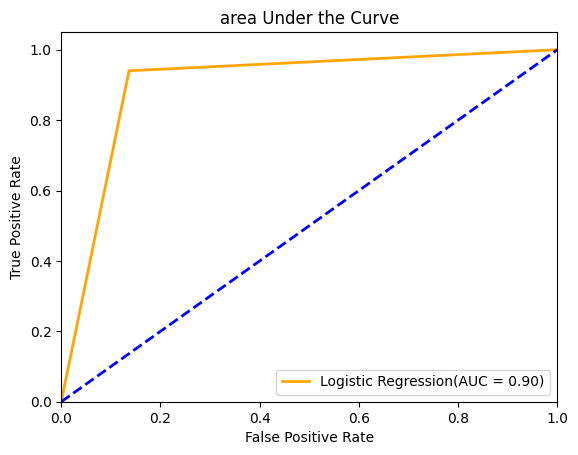

In [45]:
plt.figure(1)
lw=2
plt.plot(fpr_dt,tpr_dt,color='orange',lw=lw,label='Logistic Regression(AUC = %0.2f)'%roc_auc_dt)
plt.plot([0,1],[0,1],color='blue',lw=lw,linestyle='--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("area Under the Curve")
# plt.legend(loc="upper left")
plt.legend(loc="lower right")

In [46]:
print('Decision Tree Metrics')
print('Accuracy:', metrics.accuracy_score(y_test, y_pred_dtc))
print('Precision:', metrics.precision_score(y_test, y_pred_dtc))
print('Recall:', metrics.recall_score(y_test, y_pred_dtc))
print('f1_score:', metrics.f1_score(y_test, y_pred_dtc))
print('cnf_matrix:\n',confusion_matrix(y_test,y_pred_dtc))

Decision Tree Metrics
Accuracy: 0.75999075999076
Precision: 0.7
Recall: 0.9201277955271565
f1_score: 0.7951094458686649
cnf_matrix:
 [[1274  864]
 [ 175 2016]]


## Area under curve Decision Tree

In [47]:
from sklearn.metrics import roc_curve, auc


In [48]:
y_pred_prob = dtc.predict_proba(X_test)[:,1]
fpr_dt,tpr_dt,_=roc_curve(y_test,y_pred_dtc)
roc_auc_dt = auc(fpr_dt,tpr_dt)

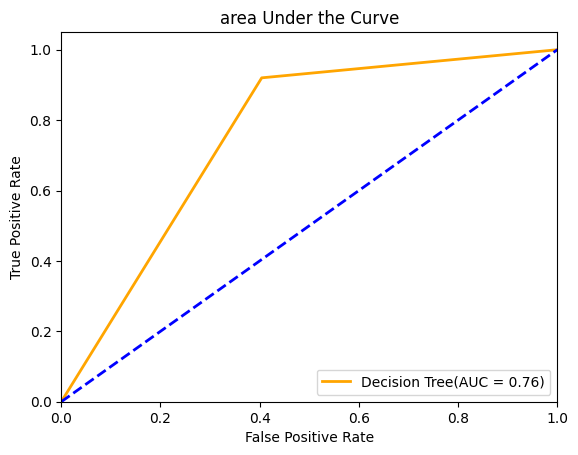

In [49]:
plt.figure(1)
lw=2
plt.plot(fpr_dt,tpr_dt,color='orange',lw=lw,label='Decision Tree(AUC = %0.2f)'%roc_auc_dt)
plt.plot([0,1],[0,1],color='blue',lw=lw,linestyle='--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("area Under the Curve")
# plt.legend(loc="upper left")
plt.legend(loc="lower right")

In [50]:
print('Random Forest Metrics')
print('Accuracy:', metrics.accuracy_score(y_test, y_pred_rfc))
print('Precision:', metrics.precision_score(y_test, y_pred_rfc))
print('Recall:', metrics.recall_score(y_test, y_pred_rfc))
print('f1_score:', metrics.f1_score(y_test, y_pred_rfc))
print('cnf_matrix:\n',confusion_matrix(y_test,y_pred_rfc))

Random Forest Metrics
Accuracy: 0.8553938553938554
Precision: 0.7925233644859813
Recall: 0.967594705613875
f1_score: 0.8713522400328811
cnf_matrix:
 [[1583  555]
 [  71 2120]]


## Area under curve Random forest

In [51]:
y_pred_prob = rfc.predict_proba(X_test)[:,1]
fpr_dt,tpr_dt,_=roc_curve(y_test,y_pred_rfc)
roc_auc_dt = auc(fpr_dt,tpr_dt)

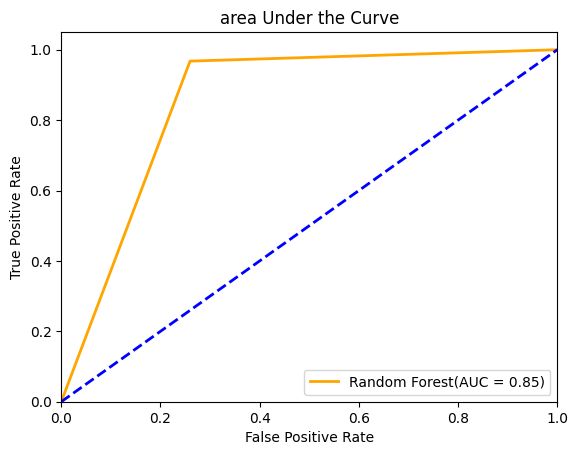

In [52]:
plt.figure(1)
lw=2
plt.plot(fpr_dt,tpr_dt,color='orange',lw=lw,label='Random Forest(AUC = %0.2f)'%roc_auc_dt)
plt.plot([0,1],[0,1],color='blue',lw=lw,linestyle='--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("area Under the Curve")
# plt.legend(loc="upper left")
plt.legend(loc="lower right")

# ADA BOOST

In [53]:
from sklearn.ensemble import AdaBoostClassifier

In [54]:
# Initialize the base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)
# Initialize the base estimator
base_estimator = DecisionTreeClassifier()

# Initialize the AdaBoost model
ada_boost = AdaBoostClassifier(base_estimator=base_estimator)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],          # Number of weak learners
    'learning_rate': [0.01, 0.1, 1.0],       # Learning rate
    'base_estimator__max_depth': [1, 2, 3]   # Max depth of the base estimator
}


In [55]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator = ada_boost, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
             param_grid={'base_estimator__max_depth': [1, 2, 3],
                         'learning_rate': [0.01, 0.1, 1.0],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [56]:
grid_search.best_params_

{'base_estimator__max_depth': 3, 'learning_rate': 1.0, 'n_estimators': 200}

In [57]:
# Initialize the base estimator
base_estimator = DecisionTreeClassifier(max_depth=3)


In [58]:
# Initialize the AdaBoost classifier
ada_boost = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=200, learning_rate=1.0, random_state=4)
ada_boost.fit(X_train, y_train)


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   n_estimators=200, random_state=4)

In [59]:
# Make predictions on the test set
y_pred_ada = ada_boost.predict(X_test)


In [60]:
from sklearn.metrics import accuracy_score, classification_report
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_ada)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print a detailed classification report
print(classification_report(y_test, y_pred_ada))


Accuracy: 95.47%
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      2138
           1       0.94      0.97      0.96      2191

    accuracy                           0.95      4329
   macro avg       0.96      0.95      0.95      4329
weighted avg       0.96      0.95      0.95      4329



In [61]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
print('ADA_BOOST')
print('Accuracy:', metrics.accuracy_score(y_test, y_pred_ada))
print('Precision:', metrics.precision_score(y_test, y_pred_ada))
print('Recall:', metrics.recall_score(y_test, y_pred_ada))
print('f1_score:', metrics.f1_score(y_test, y_pred_ada))
print('cnf_matrix:\n',confusion_matrix(y_test,y_pred_ada))

ADA_BOOST
Accuracy: 0.9547239547239548
Precision: 0.9380764163372859
Recall: 0.9748973071656778
f1_score: 0.956132497761862
cnf_matrix:
 [[1997  141]
 [  55 2136]]


In [62]:
y_pred_prob = ada_boost.predict_proba(X_test)[:,1]
fpr_ada,tpr_ada,_=roc_curve(y_test,y_pred_ada)
roc_auc_ada = auc(fpr_ada,tpr_ada)

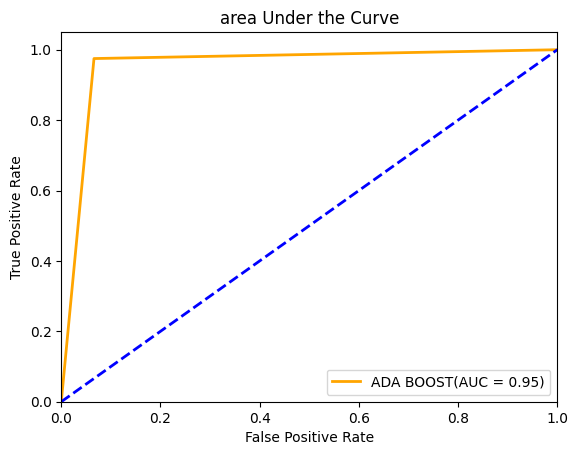

In [63]:
plt.figure(1)
lw=2
plt.plot(fpr_ada,tpr_ada,color='orange',lw=lw,label='ADA BOOST(AUC = %0.2f)'%roc_auc_ada)
plt.plot([0,1],[0,1],color='blue',lw=lw,linestyle='--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("area Under the Curve")
# plt.legend(loc="upper left")
plt.legend(loc="lower right")

## Deployment

In [64]:
def preprocess_hour_rental(data):
    preprocessing for Hour Rental
    data['feature1'] = data['feature1'].fillna(0)
    return data

def preprocess_point_to_point(data):
    preprocessing for Point to Point
    data['feature2'] = (data['feature2'] - data['feature2'].mean()) / data['feature2'].std()
    return data

def preprocess_long_distance(data):
    preprocessing for Long Distance
    data['feature3'] = data['feature3'].apply(lambda x: x if x > 0 else 0)
    return data


SyntaxError: invalid syntax (1975022522.py, line 2)

In [ ]:
def route_and_preprocess(data, travel_type):
    if travel_type == 'Hour Rental':
        model = load('hour_rental_model.pkl')
        processed_data = preprocess_hour_rental(data)
    elif travel_type == 'Point to Point':
        model = load('point_to_point_model.pkl')
        processed_data = preprocess_point_to_point(data)
    elif travel_type == 'Long Distance':
        model = load('long_distance_model.pkl')
        processed_data = preprocess_long_distance(data)
    else:
        raise ValueError("Invalid travel type")
    return model, processed_data


In [ ]:
def predict(data, travel_type):
    # Route and preprocess
    model, processed_data = route_and_preprocess(data, travel_type)
    
    # Make predictions
    predictions = model.predict(processed_data)
    return predictions
